In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import jax
from graphcast import graphcast, checkpoint

In [11]:
from config import P2TrainingEmulator as Emulator

In [4]:
from graphufs.datasets import Dataset
from graphufs.utils import get_channel_index

In [5]:
import graphufs
plt.style.use("graphufs.plotstyle")

In [12]:
emulator = Emulator()

In [13]:
tds = Dataset(emulator, mode="training")

In [14]:
xinputs, xtargets, _ = tds.get_xarrays(0)

In [15]:
xtargets

<xarray.Dataset> Size: 25MB
Dimensions:   (batch: 1, time: 1, level: 16, lat: 192, lon: 384)
Coordinates:
  * batch     (batch) int64 8B 0
  * level     (level) float64 128B 226.1 277.8 327.7 373.8 ... 874.7 922.6 974.3
  * lon       (lon) float64 3kB 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
  * lat       (lat) float64 2kB 89.82 88.89 87.95 87.01 ... -87.25 -88.18 -89.12
    datetime  (time) datetime64[ns] 8B 1994-01-01
  * time      (time) timedelta64[ns] 8B 03:00:00
Data variables:
    ugrd      (batch, time, level, lat, lon) float32 5MB dask.array<chunksize=(1, 1, 16, 192, 384), meta=np.ndarray>
    vgrd      (batch, time, level, lat, lon) float32 5MB dask.array<chunksize=(1, 1, 16, 192, 384), meta=np.ndarray>
    dzdt      (batch, time, level, lat, lon) float32 5MB dask.array<chunksize=(1, 1, 16, 192, 384), meta=np.ndarray>
    tmp       (batch, time, level, lat, lon) float32 5MB dask.array<chunksize=(1, 1, 16, 192, 384), meta=np.ndarray>
    spfh      (batch, time, level, lat, lon) float32 5MB dask.array<chunksize=(1, 1, 16, 192, 384), meta=np.ndarray>
    ugrd10m   (batch, time, lat, lon) float32 295kB dask.array<chunksize=(1, 1, 192, 384), meta=np.ndarray>
    vgrd10m   (batch, time, lat, lon) float32 295kB dask.array<chunksize=(1, 1, 192, 384), meta=np.ndarray>
    tmp2m     (batch, time, lat, lon) float32 295kB dask.array<chunksize=(1, 1, 192, 384), meta=np.ndarray>
    spfh2m    (batch, time, lat, lon) float32 295kB dask.array<chunksize=(1, 1, 192, 384), meta=np.ndarray>
    pressfc   (batch, time, lat, lon) float32 295kB dask.array<chunksize=(1, 1, 192, 384), meta=np.ndarray>

In [16]:
tidx = get_channel_index(xtargets)

In [17]:
tidx

{0: {'varname': 'dzdt', 'time': 0, 'level': 0},
 1: {'varname': 'dzdt', 'time': 0, 'level': 1},
 2: {'varname': 'dzdt', 'time': 0, 'level': 2},
 3: {'varname': 'dzdt', 'time': 0, 'level': 3},
 4: {'varname': 'dzdt', 'time': 0, 'level': 4},
 5: {'varname': 'dzdt', 'time': 0, 'level': 5},
 6: {'varname': 'dzdt', 'time': 0, 'level': 6},
 7: {'varname': 'dzdt', 'time': 0, 'level': 7},
 8: {'varname': 'dzdt', 'time': 0, 'level': 8},
 9: {'varname': 'dzdt', 'time': 0, 'level': 9},
 10: {'varname': 'dzdt', 'time': 0, 'level': 10},
 11: {'varname': 'dzdt', 'time': 0, 'level': 11},
 12: {'varname': 'dzdt', 'time': 0, 'level': 12},
 13: {'varname': 'dzdt', 'time': 0, 'level': 13},
 14: {'varname': 'dzdt', 'time': 0, 'level': 14},
 15: {'varname': 'dzdt', 'time': 0, 'level': 15},
 16: {'varname': 'pressfc', 'time': 0},
 17: {'varname': 'spfh', 'time': 0, 'level': 0},
 18: {'varname': 'spfh', 'time': 0, 'level': 1},
 19: {'varname': 'spfh', 'time': 0, 'level': 2},
 20: {'varname': 'spfh', 'time': 

In [30]:
ds = xr.load_dataset("results/loss.nc")

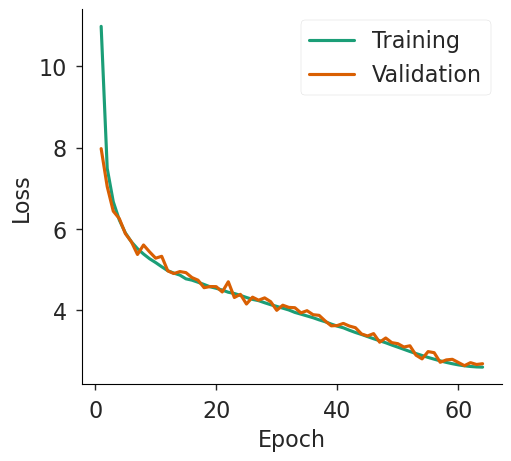

In [46]:
fig, ax = plt.subplots(figsize=(5,4.5), constrained_layout=True)
ds.loss_avg.plot(label="Training", ax=ax)
ds.loss_valid.plot(label="Validation", ax=ax)
ax.set(xlabel="Epoch", ylabel="Loss")
ax.legend()
fig.savefig(f"figures/loss.pdf", bbox_inches="tight")
fig.savefig(f"figures/loss.jpeg", bbox_inches="tight", dpi=300)

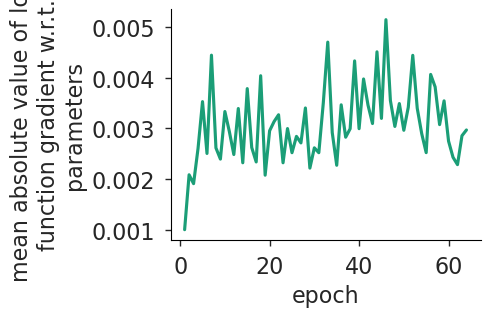

In [48]:
ds.mgrad.plot()